In [64]:
# import all the lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Loading the dataset

In [65]:
# read the dataset using pandas
data = pd.read_csv('newsalary_data.csv')

In [66]:
data.head()

,YearsExperience,Salary
0,0.5,14562
1,1.0,21562
2,1.5,25495
3,2.0,37461
4,2.5,45452


In [67]:
data.tail()

,YearsExperience,Salary
22,10.6,174560
23,10.7,189245
24,10.8,189945
25,10.9,198512
26,10.0,200485


In [68]:
# Provides some information regarding the columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  27 non-null     float64
 1   Salary           27 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 560.0 bytes


## Basic statistics about data

In [69]:
# this describes the basic stat behind the dataset used 
data.describe()

,YearsExperience,Salary
count,27.000000,27.000000
mean,6.614815,114542.592593
std,3.456288,60249.821980
min,0.500000,14562.000000
25%,3.750000,68887.500000
50%,7.000000,112345.000000
75%,10.000000,172455.000000
max,10.900000,200485.000000


## Plotting the points

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x432 with 0 Axes>

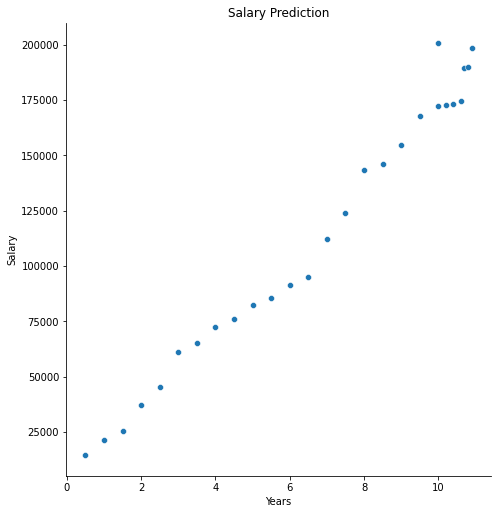

In [70]:
# These Plots help to explain the values and how they are scattered

plt.figure(figsize=(12,6))
sns.pairplot(data,x_vars=['YearsExperience'],y_vars=['Salary'],size=7,kind='scatter')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.show()

## Model Fitting - simple linear regression

In [71]:
X = data[['YearsExperience']]
y = data[['Salary']]


## Train test split

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [73]:
import statsmodels.api as sm
X_addC = sm.add_constant(X_train)
model = sm.OLS(y_train, X_addC).fit()

In [74]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     932.1
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           1.31e-17
Time:                        19:47:45   Log-Likelihood:                -219.94
No. Observations:                  21   AIC:                             443.9
Df Residuals:                      19   BIC:                             446.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             834.7375   4400.862      0.190      0.852   -8376.372       1e+04
YearsExperience  1.739e+04    569.656     30.530      0.000    1.62e+04    1.86e+04
==============================================================================
Omnibus:                        7.558   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                6.303
Skew:                           0.653   Prob(JB):                       0.0428
Kurtosis:                       5.344   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
print(model.rsquared, model.rsquared_adj)


0.9800233059996223 0.978971901052234


## Plotting the line

[17391.86303489] [834.73749212]


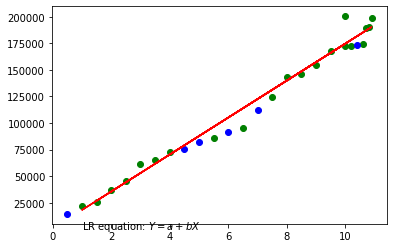

In [76]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt


X = np.array(X_train).reshape((-1, 1))
model = LinearRegression().fit(X_train, y_train)

fig = plt.figure()
ax = fig.add_subplot()

plt.scatter(X_train, y_train, color='g')
plt.scatter(X_test, y_test, color='b')

plt.plot(X_train, model.predict(X_train),color='r')
ax.text(1, 4, r'LR equation: $Y = a + bX$', fontsize=10)

print(model.coef_[0], model.intercept_)

## Making the prediction

In [109]:
from statsmodels.base.data import ModelData
# Predicting the Salary for the Test values  
X_test_c = sm.add_constant(X_test)

X_test['y_test'] = y_test


In [77]:
X_test

,YearsExperience
8,4.5
13,7.0
9,5.0
21,10.4
0,0.5
11,6.0
